In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [96]:
puff10=pd.read_csv("10_Puff_4_Min_Nicotine_BloodResults.csv",index_col=0)

In [97]:
puff10

,18-002(16ARUP),32-002,33-002,34-001,19-004,35-001,36-001,37-001,38-001
Baseline,3,3,7,8,10,5,7,6,2
2,5,10,13,15,9,9,2,2,2
4,13,13,9,9,19,9,9,4,3
6,12,12,9,14,14,8,6,6,4
8,8,16,13,16,12,10,6,6,5
10,12,11,11,15,19,27,6,9,5
EOS,10,17,13,12,12,12,5,5,4
Cotinine (BL),90,167,137,200,102,77,359,56,9
FagerStrom,6,6,6,7,6,6,6,"5,8","4,2,9"
Cig/Day,0_10,20_30,11_20,0_10,11_20,11_20,0_10,"11_20,20_30","0_10,20_30"


In [98]:
puff10t = puff10.transpose()
puff10t

,Baseline,2,4,6,8,10,EOS,Cotinine (BL),FagerStrom,Cig/Day,Gender,Age,Weight (lb),"Height ("")"
18-002(16ARUP),3,5,13,12,8,12,10,90,6,0_10,M,22,135,70
32-002,3,10,13,12,16,11,17,167,6,20_30,M,52,155,75
33-002,7,13,9,9,13,11,13,137,6,11_20,M,28,187,73
34-001,8,15,9,14,16,15,12,200,7,0_10,M,30,207,71
19-004,10,9,19,14,12,19,12,102,6,11_20,M,24,155,67
35-001,5,9,9,8,10,27,12,77,6,11_20,M,30,135,69
36-001,7,2,9,6,6,6,5,359,6,0_10,M,22,160,64
37-001,6,2,4,6,6,9,5,56,"5,8","11_20,20_30",M,22,165,71
38-001,2,2,3,4,5,5,4,9,"4,2,9","0_10,20_30",M,24,157,68


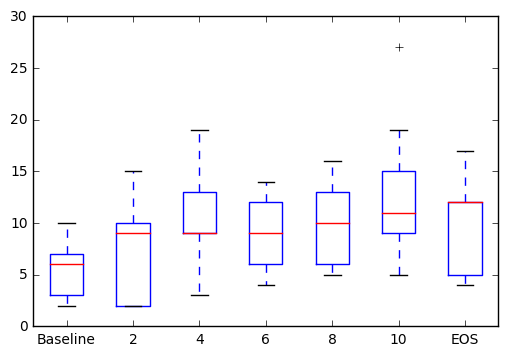

In [99]:
plot_x = ["Baseline","2","4","6","8","10","EOS"]
num_columns = ['Age','Weight (lb)','Height (")']
puff10t[plot_x]=puff10t[plot_x].apply(pd.to_numeric)
puff10t[num_columns]=puff10t[num_columns].apply(pd.to_numeric)
puff10t[plot_x].plot(kind='box')

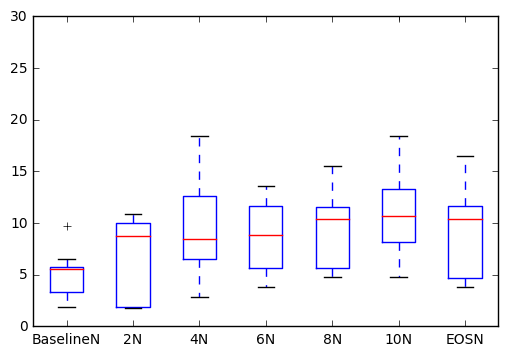

In [100]:
plot_x_norm = ["BaselineN","2N","4N","6N","8N","10N","EOSN"]
puff10t[plot_x_norm]=puff10t[plot_x].divide(puff10t['Weight (lb)'],axis=0)*150
puff10t[plot_x_norm].plot(kind='box')

In [101]:
nic_norm_mean=np.array(puff10t[plot_x_norm].mean())
nic_norm_std=np.array(puff10t[plot_x_norm].std())
puff_norm=np.array([0,2,4,6,8,10])
p=np.polyfit(puff_norm,nic_norm_mean[:-1],1)
print(p)
linefit = p[1]+puff_norm*p[0]

[ 0.61446852  5.57605865]


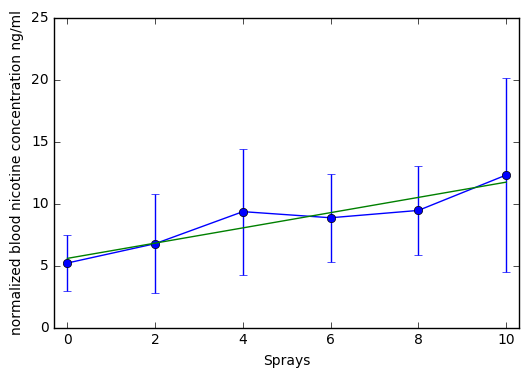

In [105]:
plt.errorbar(puff_norm,nic_norm_mean[:-1],yerr=nic_norm_std[:-1], marker='o')
plt.plot(puff_norm,linefit)
plt.xlim((-0.3,10.3))
plt.xlabel('Sprays')
plt.ylabel('normalized blood nicotine concentration ng/ml')